# Expanatory Data Analysis on World Happiness Report 2021

## Introduction

* This notebook is an exploratory data analysis on world happiness reports data and to explore what makes a country happy. 
* The World Happiness Report is a landmark survey of the state of global happiness. 
* The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. 
* Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. 
* The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
* This analsys was created based on [Kaggle](https://www.kaggle.com) datasets. The Following sources have been used in this notebook: 
    
    * [World Happiness Report 2021](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)
    * [World Happiness Report 2021](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf)


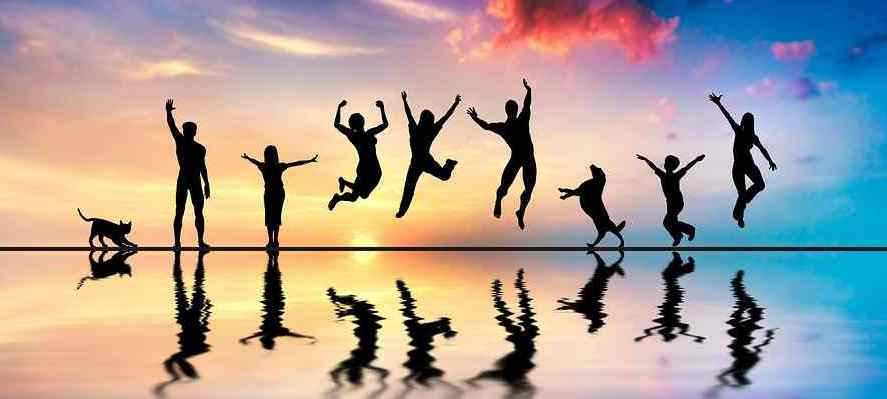

## Data Content

* The happiness scores and rankings use data from the Gallup World Poll. 

* The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 

* They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## Features

* **Ladder score:** the national average response to the question of life evaluations. The English wording of the question is “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” This measure is also referred to as Cantril life ladder, or just life ladder in our analysis.

* **Logged GDP per capita:**  iThe GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.

* **Healthy Life Expectancy (HLE):** Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository 

* **Social support:**  the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

* **Freedom to make life choices:**  the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

* **Generosity:** is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.

* **Corruption Perception:** The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” The overall perception is just the average of the two 0-or-1 responses. The corruption perception at the national level is just the average response of the overall perception at the individual level.

## Overview

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use('seaborn-notebook')
import matplotlib.gridspec as gs

import warnings
warnings.filterwarnings('ignore')

background_color='rgb(248, 248, 255)'
from sklearn.linear_model import LinearRegression

pastdf = pd.read_csv('input/world-happiness-report.csv')
newdf = pd.read_csv('input/world-happiness-report-2021.csv')

## Initial Overview¶

First we look at the data and rename some of the features:

In [2]:
print(pastdf.info())
print(newdf.info())
#pastdf.head()
#newdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB
None
<clas

In [3]:
#pastdf.describe()
#newdf.describe()

In [4]:
pastdf.rename(columns={'Country name': 'Country', 'Life Ladder':'Ladder score'}, inplace=True)
newdf.rename(columns={'Country name': 'Country'}, inplace=True)

Let's have an initial overview of the world map in terms of happiness score:

In [5]:
fig = px.choropleth(newdf, locations='Country',
                    color='Ladder score',
                    locationmode='country names',
                    color_continuous_scale=px.colors.diverging.PRGn,
                   )
fig.update_layout(
    title_text='2021 World Happiness Scores',
    title_font_size=30,

    geo_showframe=False,
    paper_bgcolor='skyblue',
    geo_bgcolor='skyblue', 
)
fig.show()

The map gives a general idea of how countries in different regions have ranked as per the happiness report. To get a better understanding of the distribution of scores, It is beneficial to also look at the distribution graph and where the 2021 mean-score, the happiest and least happy countries are located in the graph. I have also plotted the mean for U.S. and Canada to get a more personal sense of the scales. 

In [6]:
ends = newdf[['Country','Ladder score']].sort_values(by='Ladder score', ascending=False).iloc[[0,-1]]
ends

Country  Ladder score
0        Finland         7.842
148  Afghanistan         2.523

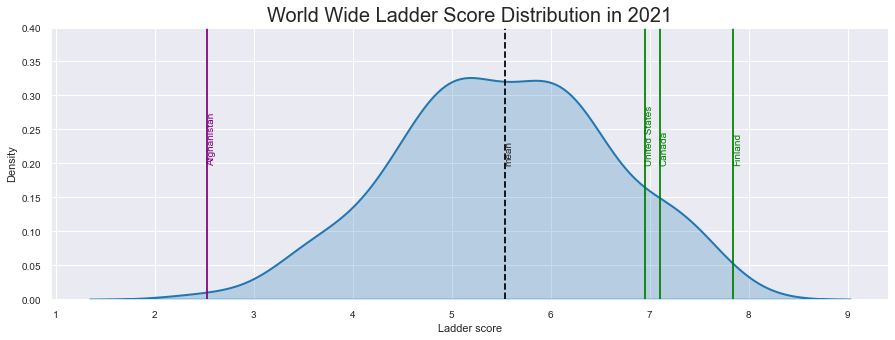

In [7]:
#Ladder Score Distribution by Regional Indicator¶
plt.figure(figsize = (15,5))
sns.kdeplot(newdf['Ladder score'], linewidth = 2, fill = True)
plt.axvline(newdf['Ladder score'].mean(), c='black',ls='--')
plt.text(newdf['Ladder score'].mean(), y=0.2, s='mean', rotation=90)
plt.axvline(newdf[newdf['Country']=='Finland']['Ladder score'].mean(), c='green')
plt.text(newdf[newdf['Country']=='Finland']['Ladder score'].mean(), y=0.2, s='Finland', c='green', rotation=90)
plt.axvline(newdf[newdf['Country']=='Afghanistan']['Ladder score'].mean(), c='purple')
plt.text(newdf[newdf['Country']=='Afghanistan']['Ladder score'].mean(), y=0.2, s='Afghanistan', c='purple', rotation=90)
plt.axvline(newdf[newdf['Country']=='Canada']['Ladder score'].mean(), c='green')
plt.text(newdf[newdf['Country']=='Canada']['Ladder score'].mean(), y=0.2, s='Canada', c='green', rotation=90)
plt.axvline(newdf[newdf['Country']=='United States']['Ladder score'].mean(), c='green')
plt.text(newdf[newdf['Country']=='United States']['Ladder score'].mean(), y=0.2, s='United States', c='green', rotation=90)
plt.ylim(0, .4)
plt.title('World Wide Ladder Score Distribution in 2021', fontsize=20, y=1)
plt.show()

From the overview map, It appeared that many of the countries in Europe and America are higher in the ladder. Let’s list the top 10 in each end and see which are the happiest and unhappiest countries in the world and which regions they are located in. 

In [29]:
happiest2021 = newdf[['Country','Ladder score','Regional indicator']].sort_values(by='Ladder score', ascending=False)[:10]
unhappiest2021 = newdf[['Country','Ladder score','Regional indicator']].sort_values(by='Ladder score', ascending=True)[:10]

extremes=pd.concat([happiest2021,unhappiest2021]).sort_values(by='Ladder score', ascending=False)

extremes['Regional indicator'].value_counts()
extremes[['Regional indicator','Country']].groupby(['Regional indicator']).nunique().sort_values('Country', ascending=False)

Country
Regional indicator                   
Western Europe                      9
Sub-Saharan Africa                  7
Latin America and Caribbean         1
Middle East and North Africa        1
North America and ANZ               1
South Asia                          1

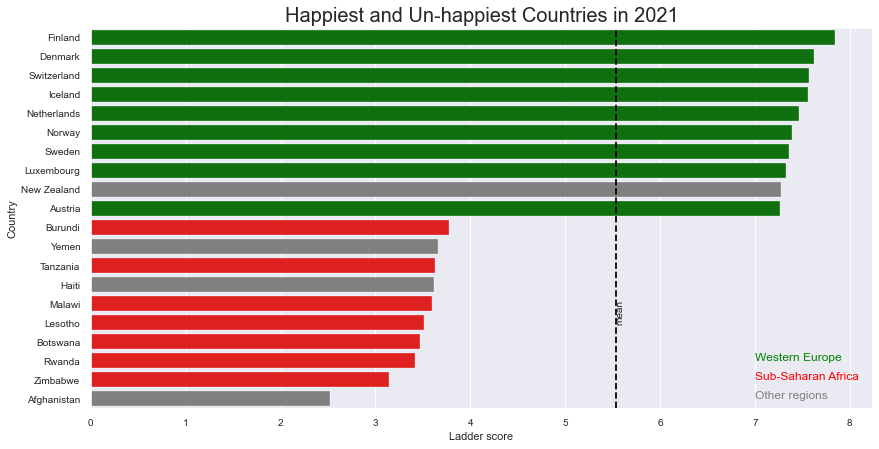

In [37]:
#print(list(extremes['Regional indicator'].unique()))
color_map={'Western Europe':'green', 'Sub-Saharan Africa':'red', 'North America and ANZ':'gray',  'Middle East and North Africa':'gray', 'Latin America and Caribbean':'gray', 'South Asia':'gray'}
extremes['color']=extremes['Regional indicator'].map(color_map)
plt.figure(figsize=(14,7))
sns.barplot(x = 'Ladder score', 
            y = 'Country', 
            data=extremes, 
            palette=extremes['color'],
           )
plt.axvline(newdf['Ladder score'].mean(), c='black',ls='--')
plt.text(newdf['Ladder score'].mean(), y=15, s='mean', rotation=90)
plt.title("Happiest and Un-happiest Countries in 2021", fontsize=20, y=1)
plt.annotate('Western Europe', xy=(7, 17), fontsize=12, color='green')
plt.annotate('Sub-Saharan Africa', xy=(7, 18), fontsize=12, color='red')
plt.annotate('Other regions', xy=(7, 19), fontsize=12, color='grey')
plt.show()


It is clear that many of the happiest countries are amongst European (green) and many of the least happy countries are amongst African Countries (red). 
Now let's compare the mean score for all regions and also look at the score distribution in each.

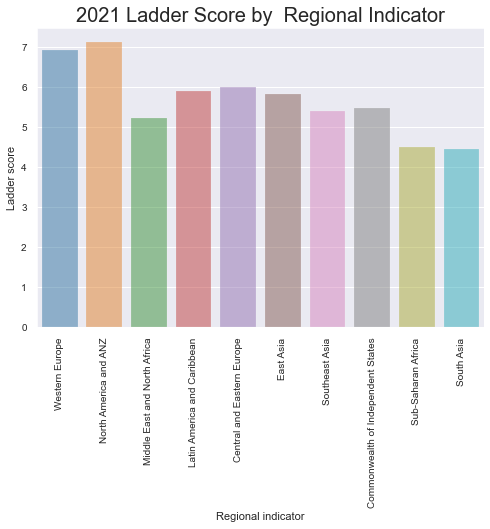

In [10]:
#Ladder score by Regional Indicator
sns.barplot(data=newdf, x='Regional indicator', y='Ladder score', estimator=np.mean, ci=None, alpha=.5)
plt.xticks(rotation = 90)
plt.title('2021 Ladder Score by  Regional Indicator', fontsize=20, y=1)
plt.show()

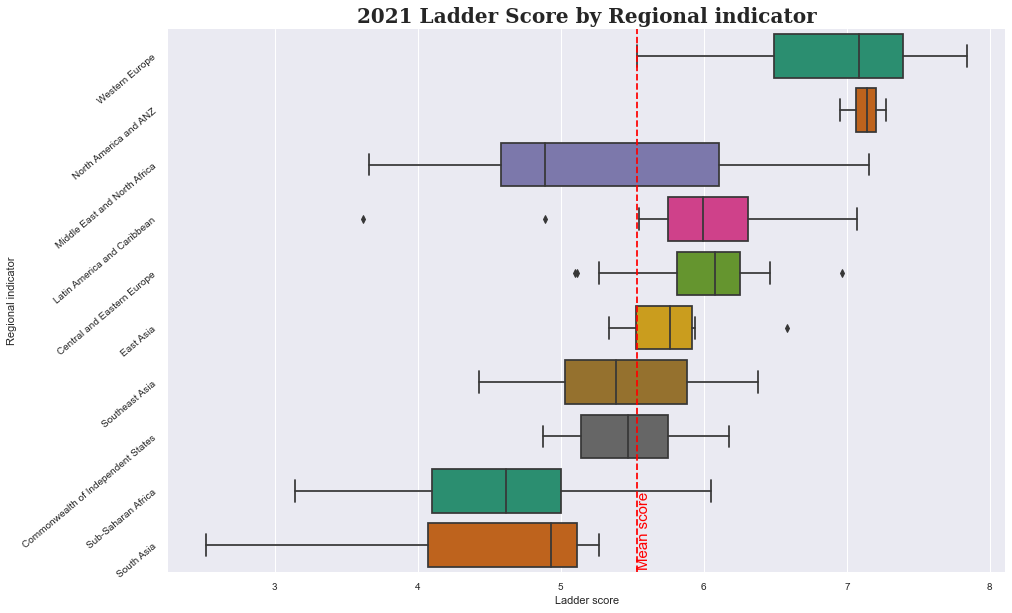

In [42]:
fig=plt.figure(figsize=(15,10))
plt.title("2021 Ladder Score by Regional indicator",family='Serif', weight='bold', size=20)
sns.boxplot(x=newdf['Ladder score'],y=newdf['Regional indicator'], palette='Dark2')
plt.axvline(newdf['Ladder score'].mean(), c='red',ls='--')
plt.text(x=newdf['Ladder score'].mean(),y=9.4, s='Mean score', c='red', size=15, rotation=90 )
plt.yticks(rotation = 40)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

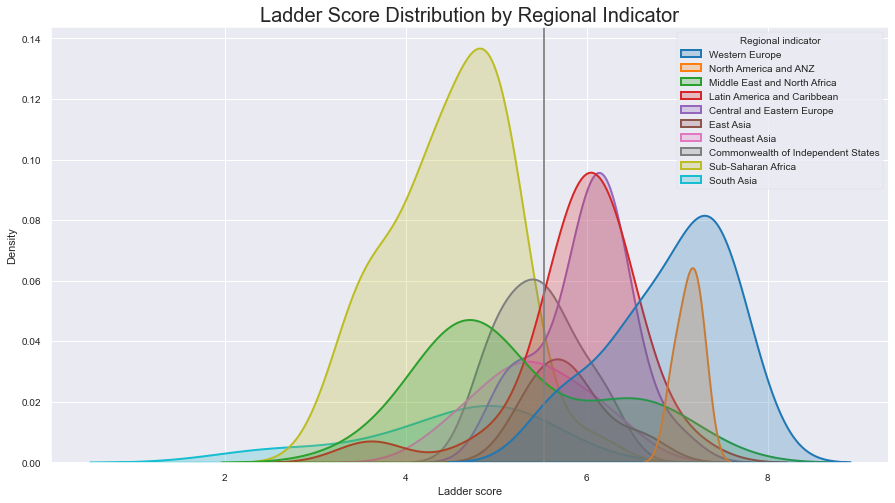

In [12]:
#Ladder Score Distribution by Regional Indicator¶
plt.figure(figsize = (15,8))
sns.kdeplot(newdf['Ladder score'], hue = newdf['Regional indicator'], linewidth = 2, fill = True)
plt.axvline(newdf['Ladder score'].mean(), color = 'gray')
plt.title('Ladder Score Distribution by Regional Indicator', fontsize=20, y=1)
plt.show()

It is clear that Western Europe and North America and ANZ have higher mean happiness scores. The scores in Western Europe is more widely spread compared to the North America scores, however they have a lower mean.

## The Happiness Shifts over Time
Let's now look at how the scores have changed over the years until 2020:

In [13]:
time_df=pastdf.sort_values(['year'],ascending=True)
fig = px.choropleth(time_df, locations='Country',
                    color='Ladder score',
                    locationmode='country names',
                    color_continuous_scale=px.colors.diverging.PRGn,
                    animation_frame='year',
                   )
fig.update_layout(
    title_text='World Happiness Scores Over time',
    title_font_size=30,

    geo_showframe=False,
    paper_bgcolor='skyblue',
    geo_bgcolor='skyblue', 
)
fig.show()

The map does not show any visible trend in general. 
To distinctly compare 2021 particularly considering that covid-19 has had quite an impact on people's lives, I have plotted the mean score, the score from 2021 as well as past scores for extreme countries that were top 10 from each end of the ladder.

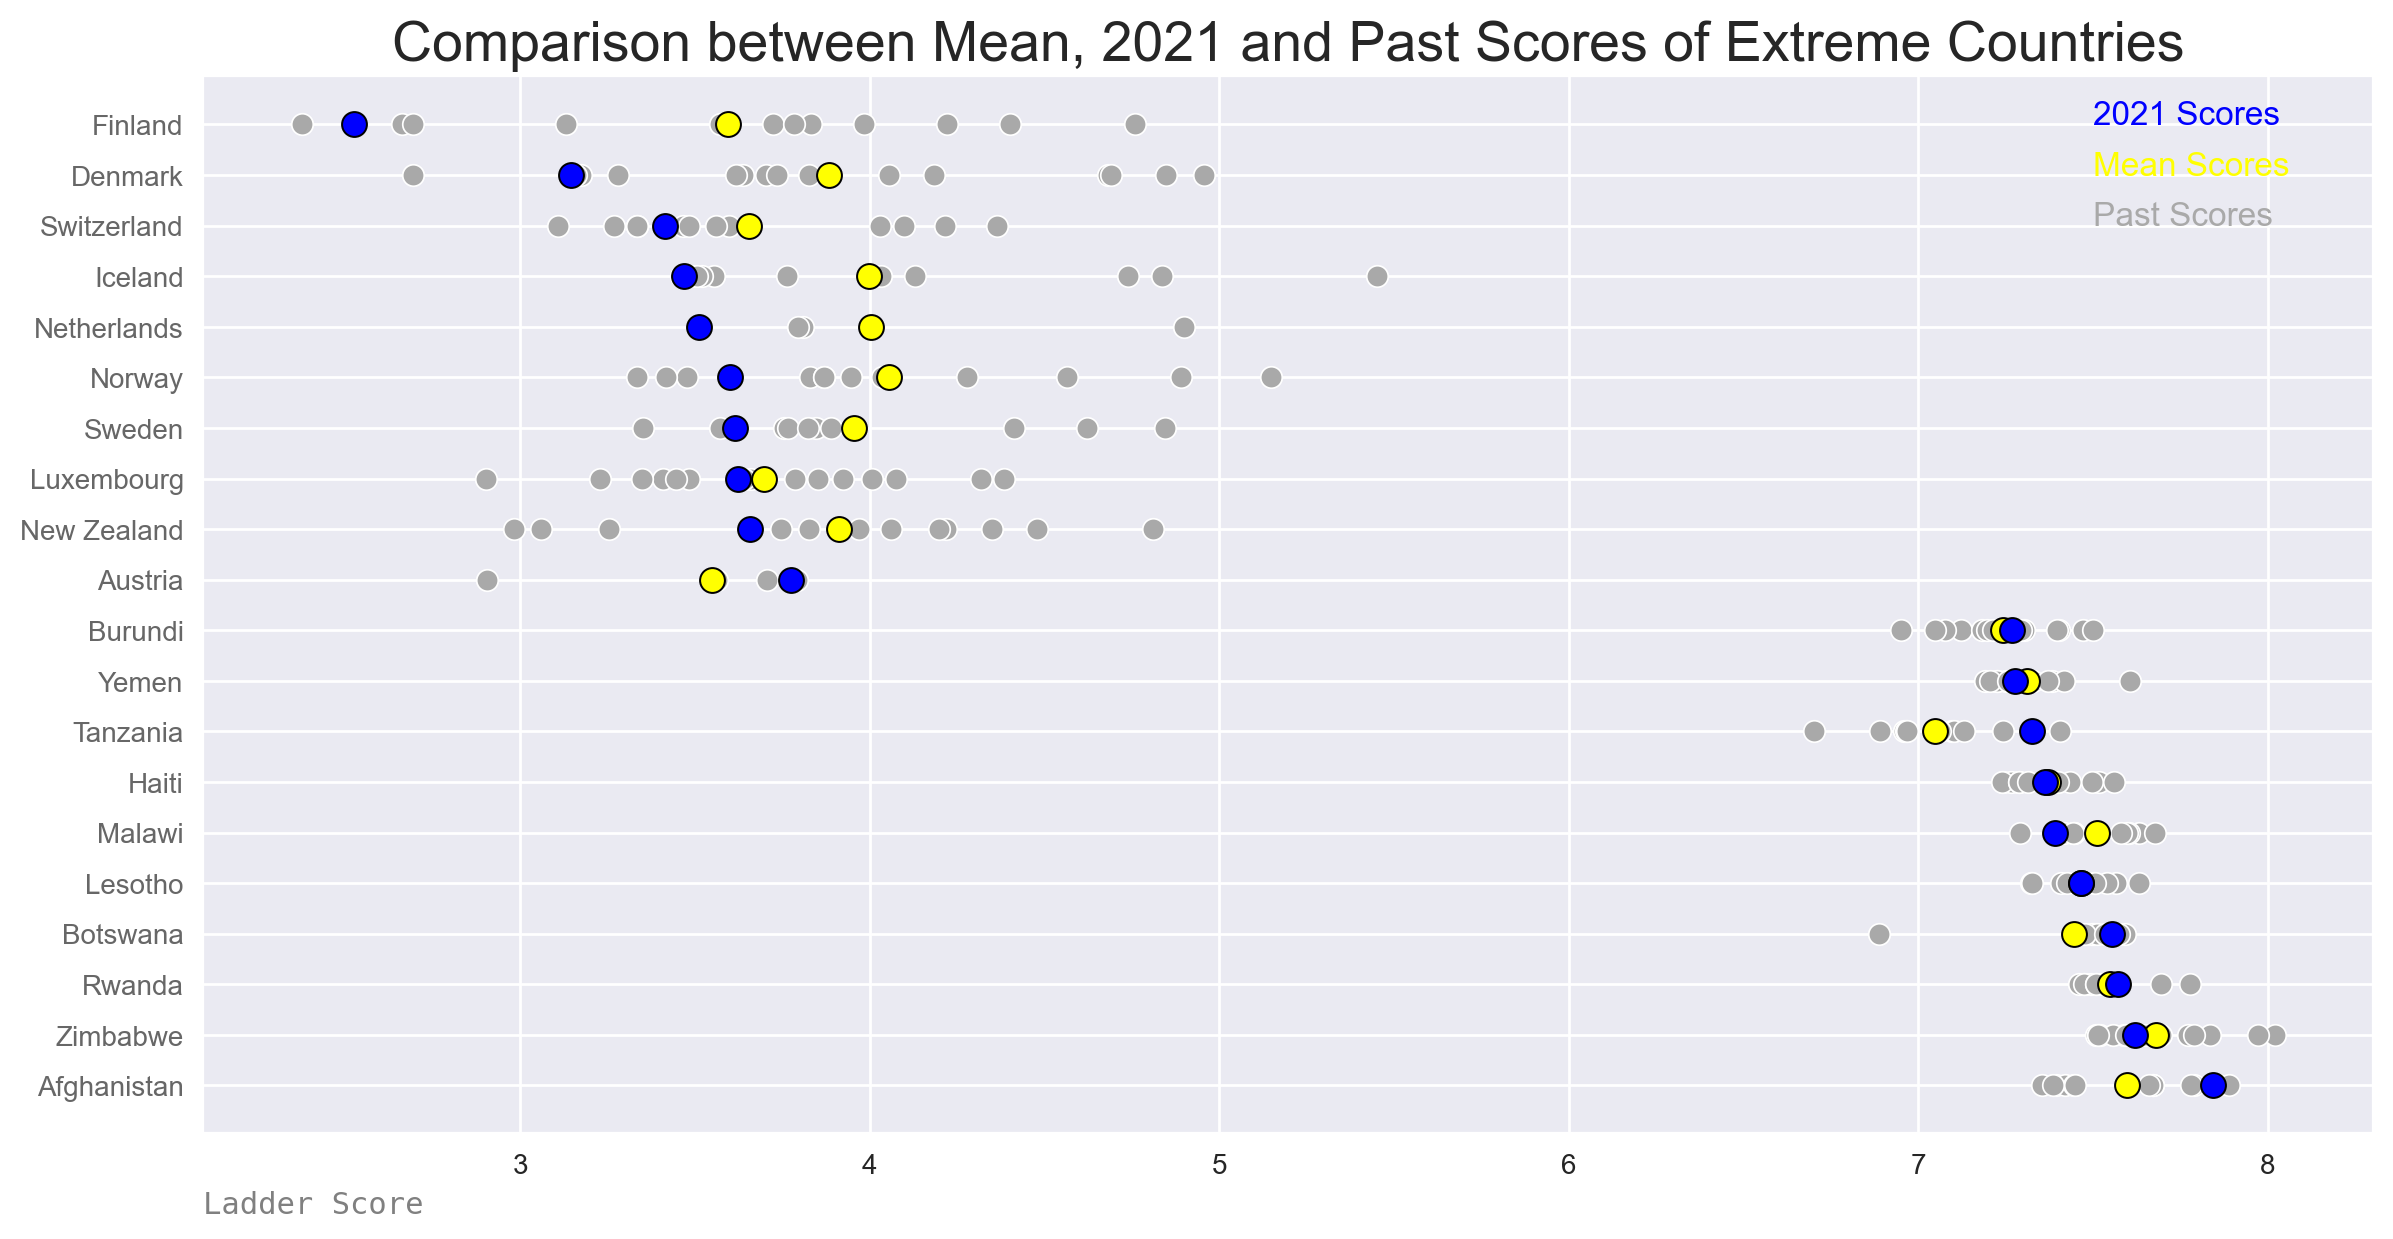

In [14]:

fig, ax = plt.subplots(1,1, figsize=(14, 7),dpi=200)

# Reduced list as too many to show all at once 
extreme_countries = list(extremes['Country'].unique())

y_start = 0
for country in extreme_countries:
    mean = pastdf[pastdf['Country'] == country].groupby('Country')['Ladder score'].mean()
    
    sns.scatterplot(data=pastdf[pastdf['Country'] == country], y=y_start, x='Ladder score',color='darkgray',s=60)
    sns.scatterplot(data=pastdf[pastdf['Country'] == country], y=y_start, x=mean,color='yellow',ec='black',s=80)
    sns.scatterplot(data=newdf[newdf['Country'] == country], y=y_start, x='Ladder score',color='blue',ec='black',s=80)   
    y_start += 1


ax.set_yticks(np.arange(len(extreme_countries)))
ax.set_yticklabels(extreme_countries[::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Happiness Index Score",fontfamily='monospace',loc='left',color='gray')

ax.set_axisbelow(True)
ax.set_xlabel( 'Ladder Score')

plt.annotate('2021 Scores', xy=(7.5, 19), fontsize=12, color='blue')
plt.annotate('Mean Scores', xy=(7.5, 18), fontsize=12, color='yellow')
plt.annotate('Past Scores', xy=(7.5, 17), fontsize=12, color='darkgrey')
plt.title('Comparison between Mean, 2021 and Past Scores of Extreme Countries', fontsize=20)

plt.show()

It appears that for most of the happy countries ,the 2021 was ranked lower than the mean. However there is no visible pattern for least happy countries. It is helpful to also look at the trend for these countries, to check if there has been a sudden change in 2021.

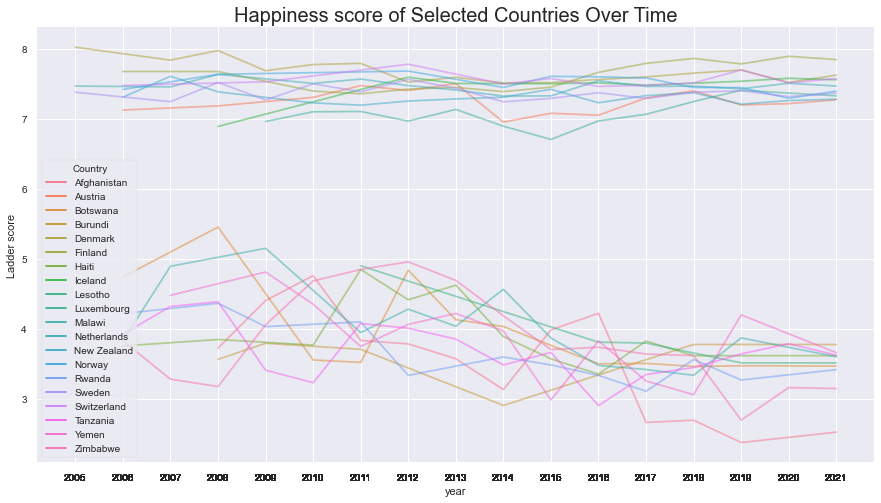

In [15]:
df1=pastdf[['year','Country','Ladder score']]
df2=newdf[['Country','Ladder score']]
df2['year']=2021
concat_df=pd.concat([df1,df2])
selected_countries=extremes.Country

selected_df=concat_df[concat_df['Country'].isin(selected_countries)]

fig=plt.figure(figsize=(15,8))
ax=plt.subplot()
ax=sns.lineplot(data=selected_df, x='year', y='Ladder score', alpha=0.5, hue='Country', markers=True)
plt.title('Happiness score of Selected Countries Over Time', fontsize=20, y=1)
plt.xticks(concat_df['year'])
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)
plt.show()

Contrary to the expectations, there is no visible sudden changes for 2021. Interestingly, many of the top 10 countries in the happy end have had an slight increase in their happiness score.

## Features Analysis
I would assume that among the features, GDP per capita, Social support, HLE and Freedom to make life choices would be of the factors that are strongly related to how the population of a country feel in terms of general happiness. However, Generosity and perceptions of corruption are not that readily related to the happiness. 
To understand if and how each factor contributed to the happiness scores we initially look at how each is distributed:


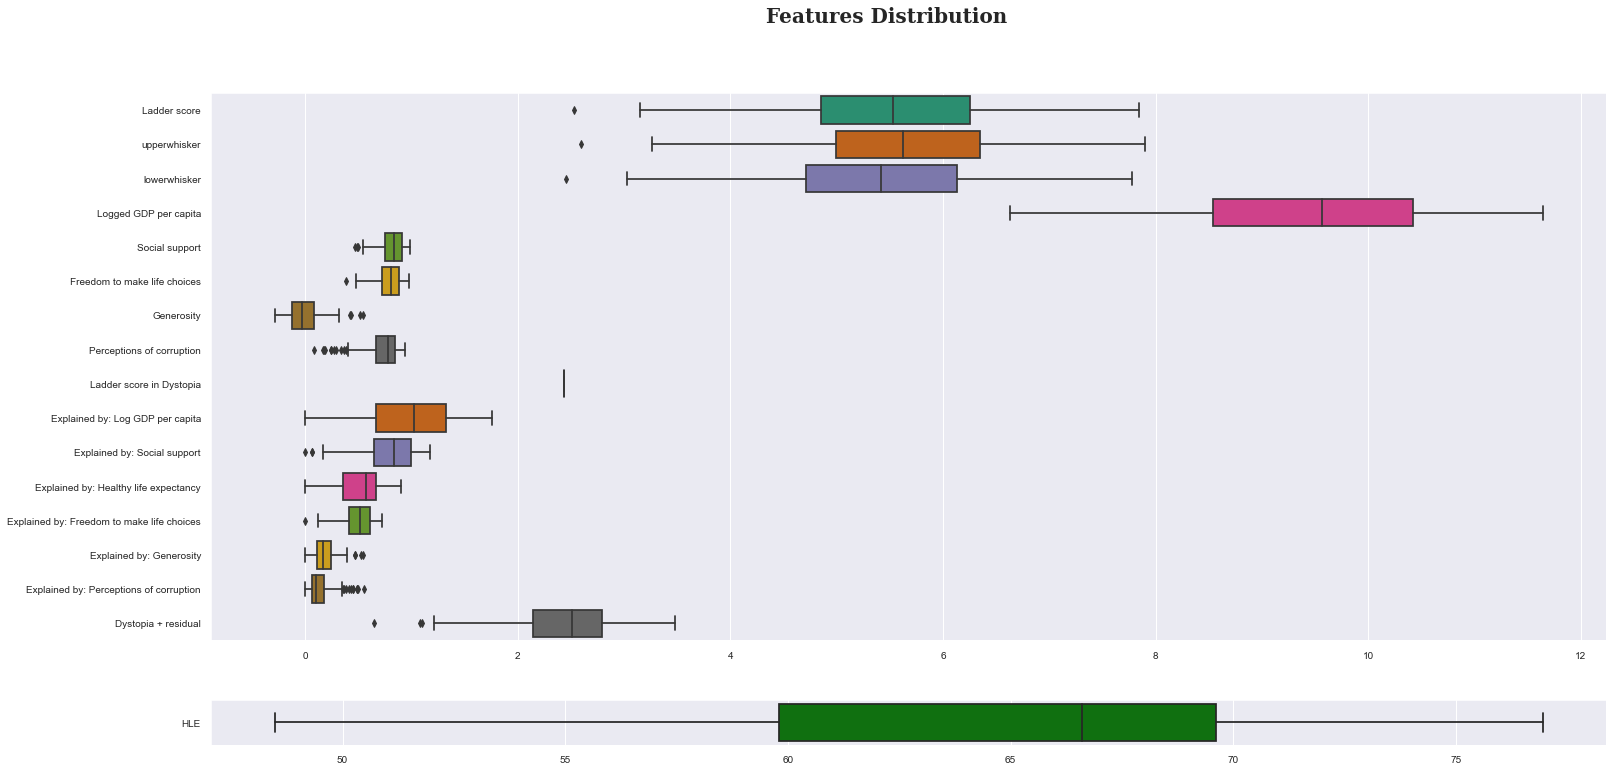

In [16]:
fig= plt.figure(figsize=(25,12))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig, height_ratios=[12, 1])
plt.suptitle("Features Distribution", family='Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])


feature_data=newdf.drop(['Healthy life expectancy','Standard error of ladder score'], axis=1, inplace=False)
ax1=sns.boxplot(data = feature_data,
            orient = 'h', palette = 'Dark2')

ax2=plt.subplot(g[1,0])
HLE=newdf['Healthy life expectancy']
ax2=sns.boxplot(data = HLE,
            orient = 'h', color = 'green')
ax2.set_yticks([0])
ax2.set_yticklabels(['HLE'])
plt.show()

From the overview section, we observed the scores were distributed quite differently in each region. We have to also consider how the features are distributed in each region as well.  

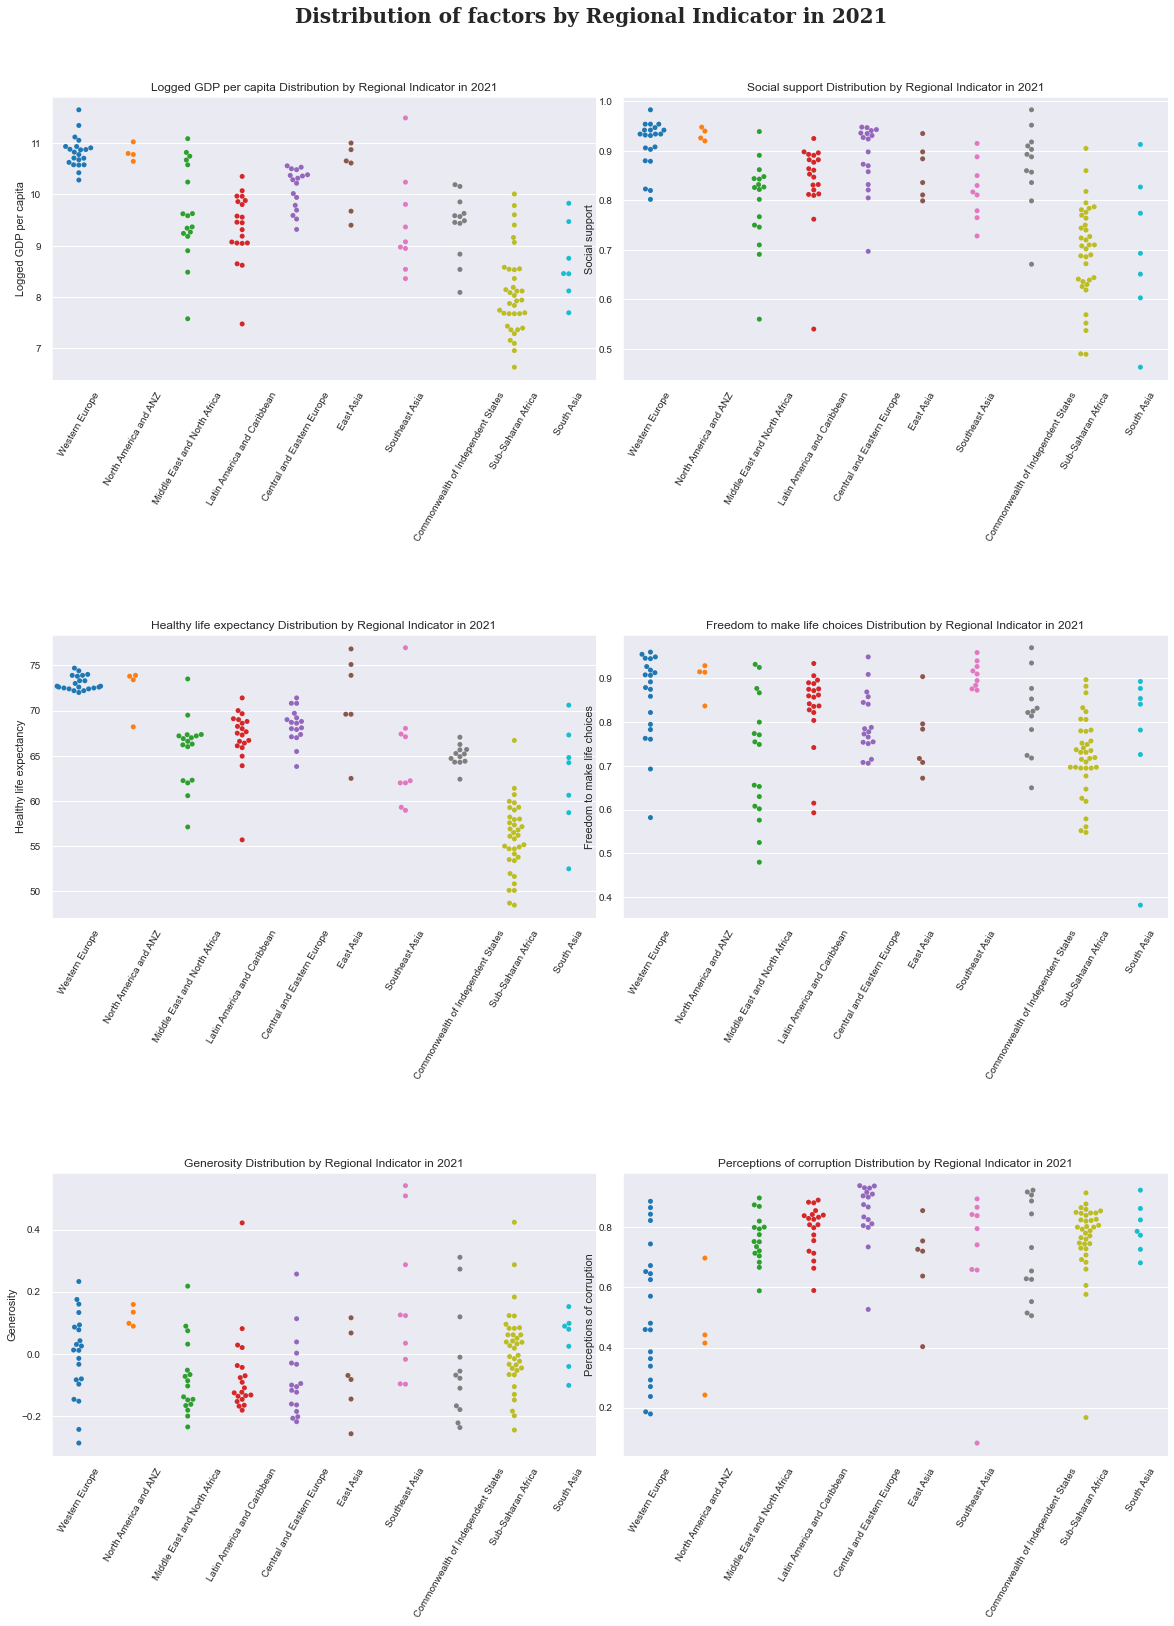

In [17]:
factors=[['Logged GDP per capita', 'Social support'], ['Healthy life expectancy',
       'Freedom to make life choices'], ['Generosity',
       'Perceptions of corruption']]

nrows=3
ncols=2
fig= plt.figure(figsize=(20,25))
g=gs.GridSpec(nrows=nrows, ncols=ncols,figure=fig, wspace=0.05, hspace=.9)
plt.suptitle("Distribution of factors by Regional Indicator in 2021", family='Serif', weight='bold', size=20, y=.93)

for i in range(nrows):
    for j in range(ncols):

        ax=plt.subplot(g[i,j])
        ax=sns.swarmplot(x='Regional indicator', y=factors[i][j], data = newdf)
        ax.set_title(f'{factors[i][j]} Distribution by Regional Indicator in 2021')
        plt.xticks(rotation = 60)
        plt.xlabel("")
plt.show()

To study if and how the features have affected the happiness score, we fist plot the heatmap of their correlatoin. 

<AxesSubplot:>

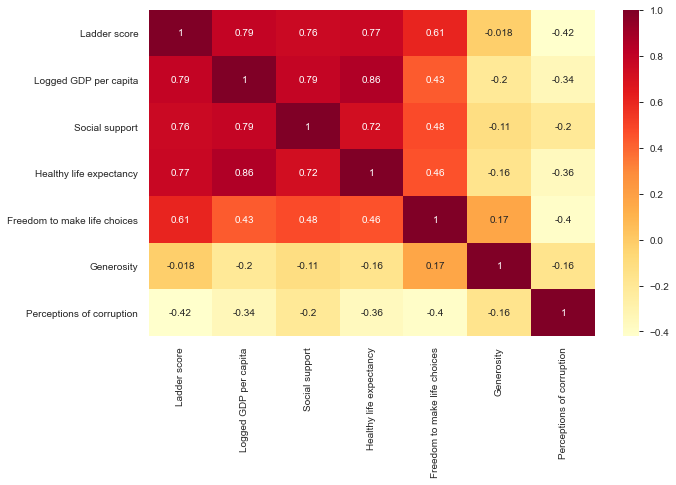

In [18]:
corr_set=['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
correlation=newdf[corr_set].corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap="YlOrRd")

It appears that there is strong positive correlation between the happiness score and GDP per capita, social support, HLE and Freedom to make life choices. The generosity appears to be uncorrelated with other features and happiness scores while perception of corruption looks negatively correlated with happiness score. 
To better analyze these correlations It is beneficial to also use a linear regression to study each pairs as below:

In [19]:
ladder_score = newdf['Ladder score'].values.reshape(-1,1)
model = LinearRegression()
def plot_correlation(factor):
    model.fit(ladder_score, newdf[factor])

    y_range = np.linspace(ladder_score.min(), ladder_score.max(), 100)
    x_range = model.predict(y_range.reshape(-1, 1))

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=newdf[factor], y=newdf['Ladder score'], mode='markers', marker_color='green',
                             customdata=newdf['Country'],
                             hovertemplate='<br>'.join(['<b>%{customdata}</b>', factor+': %{x}','Ladder score: %{y}']),
                             marker_size=10,
                             name='Countries'))
    fig.add_trace(go.Scatter(x=x_range, y=y_range,
                             name='Linear Regession',
                             line_color='blue',
                             line_width=3))

    fig.update_layout(title_text=f'Correlation between Ladder score and {factor}',
                      paper_bgcolor=background_color,
                      plot_bgcolor=background_color,
                      xaxis_title_text=factor,
                      yaxis_title_text='Ladder Score',
                      showlegend=False,
                      height=500, width=800
                     )
    
    fig.show()
     #plot_correlation('Logged GDP per capita')


In [20]:
corelation_factors=['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
for i in range(len(corelation_factors)):
    ax=plot_correlation(corelation_factors[i])
    print('\n')

The observations are as below:

* As expected and also observed in the heatmap, there is a clear positive correlation between Ladder Score and:
    * GDP per capita,
    * Social support,
    * HLE and
    * Freedom to make life choices.


* As was observed in the heatmap as well, there is a negative correlation between Perceptions of corruption and Ladder score. We can translate this as people will not feel happy in a country where they feel is suffering corruption. However, it is interesting that Rwana (one of the least happy countries) is not corrupt. This can be associated with drastic effects of other features. 

* As observed before no significant correlation exists between happiness score and generosity.



## Conclusion

* Although defining happiness is one of the hardest questions to answer, the happiness report gives an interesting insight to some of the factors to which happiness is related. Amongst those having high GDP and Freedom to make life choices are the most significant factors for a happy nation. 

* People in Western Europe and North America are happier compared to people in many other regions. 

* Despite Covid-19, there has been no shift in the happiness scores and in fact many countries have experienced an slight increase. 

